# Importing

I almost always import the same libraries (`numpy`, `pandas`, `matplotlib`, `datetime`, ...). In order to avoid typing the same thing in all Notebooks, I do the imports in a module that exports all imports in `__all__`, so I can directly import everyting in a line. I also added a few custom functions I often use.

I called the module `imports`, and put it in my `PYTHONPATH` (all my repositories are stored in `~/repos/` which is in my `PYTHONPATH`).

*You can see that file at the very end of this Notebook.*

In [1]:
from imports import *

---

# Auto-restart external code

I use Notebooks only for quick coding, and save valuable functions (or classes) in proper files as soon as I realise it is important. I often edit the code (that's located in separate files) and want to use the updated functions immediately, without having to re-import everything or restart the Notebook. Thankfully, there's a way to do that :

In [2]:
%load_ext autoreload
%autoreload 2

# Zoomable plots

To have editable plots, use `%matplotlib notebook` or `%matplotlib qt5`. `%matplotlib inline` only produces static images, which I find quite frustrating. The difference between `notebook` or `qt5` is that `qt5` will open the figure in a separate window, which is often useful and sometimes a bit frustrating. Sadly, you can't switch between both in a single Notebook.

In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


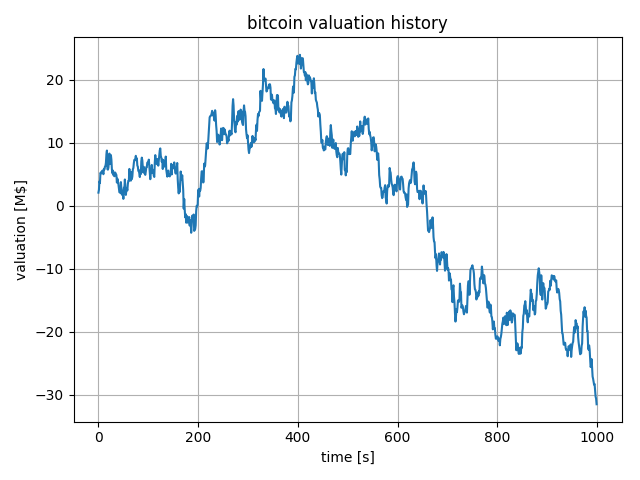

In [4]:
plt.plot(np.random.randn(1000).cumsum())

Use the commands just above this cell to zoom in the plot!

You can later alter the plot:

In [5]:
plt.grid()
plt.title('bitcoin valuation history')
plt.xlabel('time [s]')
plt.ylabel('valuation [M$]')

Text(35.4722,0.5,'valuation [M$]')

When I have a figure I like, I save it using a function from my `imports` module. The next line automatically saves the figure in my `$HOME/figures/YYYYMMDD` folder.

In [6]:
save_fig('bitcoin valuation history')

---

# Documentation

When you're unsure about function arguments, use `Shift` + `Tab` when you're between brackets to get arguments.

If you keep pressing `Shift` and press `Tab` twice, you will open a larger scrollable box to read the full documentation. If you want an even larger box, press `Tab` four times, a big box will appear at the bottom of the screen.

Test when the cursor is **between the brackets** in the next cell.

In [ ]:
pd.Series.describe()

---

# Use keyboard Shortcuts!
There a two editing modes when you're in a notebook :
- the edit mode (when the cursor is active in a cell, no special shortcut here). When a cell is selected, press enter to go to edit mode
- the command mode. When there is no active cursor in a cell, keyboard shortcuts are used for general settings or cell management. Press `Esc` or click outside a cell to enter command mode.

In command mode, shortucts consist (mostly) of pressing a single key, no need for the `Ctrl` or `Cmd` key. Press `h` to list the shortcuts. The shortcuts I find most useful are:
- `Shift` + `m`. Merge current cell with cell below. Great for quickly transforming lines to a function
- `k` select cell up
- `j` select cell down. Very useful for quick navigation inside a Notebook
- `Shift` + `k`/`j` select cell up / down
- `c` copy cell(s) (you can copy / past multiple cells)
- `v` paste cell(s) below
- `x` delete cell
- `u` undo delete cell (doesn't undo other actions)
- I also like being able to move cells with `Ctrl` + `k` (up) or `Ctrl` + `j` (down). To enable it, add in you `~/.jupyter/custom/custom.js` (or create it if it doesn't exist)

```javascript
define(["base/js/namespace"], function(Jupyter){
    console.info('Binding Ctrl-J/K to move cell up/down');
    Jupyter.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-k','jupyter-notebook:move-cell-up');
    Jupyter.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-j','jupyter-notebook:move-cell-down');
});
```

On additional shortcut, valid in edit mode (inside a cell)
- `Ctrl` + `Shift` + `-`. Break the current cell at cursor

# Sublime-like multiple cursor

When you holding `Ctrl` down, each click will create a new cursor. If you want to be able to select next text occurence with `Ctrl` + `D`, Sublime-Text-like, add this to your `~/.jupyter/custom/custom.js`:

```javascript
// http://blog.rtwilson.com/how-to-get-sublime-text-style-editing-in-the-ipythonjupyter-notebook/
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython) {
    	console.info('codemirror sublime keymap');
        // setTimeout(function(){ // uncomment line to fake race-condition
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
 
        // }, 1000)// uncomment  line to fake race condition 
    } 
);
```

# Memory and time profiling

Want to know how efficient, in terms of computation time and memory your code is? Or compare implementations?

In [7]:
def f_string_interpolation(str1, str2):
    return f'{str1}{str2}'

def string_sum(str1, str2):
    return str1 + str2

def string_format(str1, str2):
    return "{}{}".format(str1, str2)

In [8]:
import string

In [9]:
str1 = ''.join([random.choice(string.ascii_letters)
                for _ in range(1000)])
str2 = ''.join([random.choice(string.ascii_letters)
                for _ in range(1000)])

In [10]:
%%timeit
f_string_interpolation(str1, str2)

205 ns ± 2.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
%%timeit
string_sum(str1, str2)

184 ns ± 4.37 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [12]:
%%timeit
string_format(str1, str2)

353 ns ± 5.92 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Note that `%%timeit` is great for only for profiling and any code run inside will have no effect on what you do. If you want to know how much time a function takes but run it once, use `%%time`:

In [13]:
%%time
time.sleep(2)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2 s


For memory profiling, you first need to

In [14]:
%load_ext memory_profiler

Then you're good to go

In [15]:
%%memit
np.array([np.random.randn(1000)
          for _ in range(10000)])

peak memory: 207.08 MiB, increment: 71.15 MiB


# Awesome progress bar
Whenever I run something take can take a long time, I love to have a progress bar. tqdm makes it crazy easy.

When inside a notebook, use `tqdm.tqdm_notebook` for a beautifoul html progress bar, and use `tqdm.tqdm` for console output.

Just do a normal for loop, and wrap whatever is after `in` in `tqdm_notebook`:

In [16]:
for value in tqdm_notebook(np.random.randn(5 * MILLION)):
    value**2

if you give an iterator, tqdm_notebook won't know the length, but you can give it to him.

In [17]:
for i, value in tqdm_notebook(enumerate(np.random.randn(5 * MILLION)),
                              total=5 * MILLION,
                              desc='awesome!'):
    value**2

You get progress bar, ETA, number of iteration per seconds for free! 🎉

---

As mentioned above, this is the content of my `imports` module, consisting of a single `__init__.py` file.

In [ ]:
# %load /home/m/repos/imports/__init__.py
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, figure, scatter
import os
import sys
import scipy
import datetime
from tqdm import tqdm, tqdm_notebook
import sklearn
import json
import operator
import collections
import random
import time
import arrow
from IPython.core.debugger import set_trace

THOUSAND = 1000
MILLION = THOUSAND**2
BILLION = THOUSAND**3


def save_fig(name=None, dpi=300, transparent=False, overwrite=False):
    if name is None:
        name = plt.gca().get_title()
        assert name, "if not passing a name, current plot should a title"
    plt.tight_layout()
    dest_folder = os.path.join(os.environ['HOME'], 'figures',
                             datetime.date.today().strftime('%Y%m%d'))
    os.makedirs(dest_folder, exist_ok=True)
    target_path = os.path.join(dest_folder, name)
    if os.path.isfile(target_path) and not overwrite:
        raise ValueError('target file ({}) already exists. Re-launch with '
                         '`overwrite=True` to overwrite file'.format(
            target_path))

    plt.savefig(target_path, dpi=dpi, transparent=transparent)


def new_plot(*args, **kwargs):
    plt.figure()
    title = kwargs.pop('title', False)
    plt.plot(*args, **kwargs)
    plt.grid()
    if title:
        plt.title(title)
    plt.tight_layout()


def describe(x):
    return pd.Series(x).describe()


def rolling_mean(s, window=3000):
    return s.rolling(window, center=True, min_periods=0).mean()


__all__ = ['np', 'pd', 'array', 'DataFrame', 'Series', 'plt', 'os', 'save_fig',
           'tqdm_notebook', 'tqdm', 'new_plot', 'plot', 'figure', 'scatter',
           'sys', 'array', 'DataFrame', 'Series', 'describe', 'scipy',
           'datetime', 'sklearn', 'json', 'operator', 'collections',
           'set_trace', 'random', 'time', 'arrow', 'rolling_mean', 'THOUSAND',
           'MILLION', 'BILLION']
